## Importing Required Libraries and Visualization Settings

In this cell, we import the fundamental Python libraries required for data analysis and visualization.  
- **pandas** and **numpy** are used for data manipulation and numerical operations.
- **matplotlib** and **seaborn** are used for data visualization.

Additionally, we configure the general visual style and display settings to improve the readability of plots and tables.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set(style="whitegrid", font_scale=1.1)
pd.set_option("display.max_columns", 200)

## Loading Technical and Market Datasets

In this step, we load the two datasets used in this project:
- The **technical dataset (JSON format)** contains detailed specifications of electric vehicles.
- The **market dataset (CSV format)** contains production and commercial information.

After loading, we check the shapes of both datasets to verify that the files are correctly imported.


In [4]:
# Technical dataset (JSON)
df_tech = pd.read_json("../data/ev-technical-dataset.json")

# Market / manufacturing dataset (CSV)
df_market = pd.read_csv("../data/ev-market-dataset.csv")

print("Technical dataset shape:", df_tech.shape)
print("Market dataset shape:", df_market.shape)

df_tech.head()

Technical dataset shape: (377, 170)
Market dataset shape: (3022, 17)


,Vehicle_ID,Vehicle_Make,Vehicle_Model,Vehicle_Model_Version,Availability_Status,Availability_Date_From,Availability_Date_From_Estimate,Availability_Date_To,Drivetrain_Type,Drivetrain_Fuel,Drivetrain_Propulsion,Drivetrain_Propulsion_Estimate,Drivetrain_Power,Drivetrain_Power_HP,Drivetrain_Power_Estimate,Drivetrain_Torque,Drivetrain_Torque_Estimate,Performance_Acceleration,Performance_Acceleration_Estimate,Performance_Topspeed,Performance_Topspeed_Estimate,Range_WLTP,Range_WLTP_Estimate,Range_WLTP_TEH,Range_NEDC,Range_NEDC_Estimate,Range_Real,Range_Real_Mode,Range_Real_WHwy,Range_Real_WCmb,Range_Real_WCty,Range_Real_BHwy,Range_Real_BCmb,Range_Real_BCty,Efficiency_WLTP,Efficiency_Economy_WLTP,Efficiency_Consumption_WLTP,Efficiency_WLTP_FuelEq,Efficiency_WLTP_V,Efficiency_Economy_WLTP_V,Efficiency_Consumption_WLTP_V,Efficiency_WLTP_FuelEq_V,Efficiency_WLTP_CO2,Efficiency_WLTP_TEH,Efficiency_Economy_WLTP_TEH,Efficiency_Consumption_WLTP_TEH,Efficiency_WLTP_TEH_FuelEq,Efficiency_WLTP_TEH_V,Efficiency_Economy_WLTP_TEH_V,Efficiency_Consumption_WLTP_TEH_V,Efficiency_WLTP_TEH_FuelEq_V,Efficiency_WLTP_TEH_CO2,Efficiency_NEDC,Efficiency_Economy_NEDC,Efficiency_Consumption_NEDC,Efficiency_NEDC_FuelEq,Efficiency_NEDC_V,Efficiency_Economy_NEDC_V,Efficiency_Consumption_NEDC_V,Efficiency_NEDC_FuelEq_V,Efficiency_NEDC_CO2,Efficiency_Real,Efficiency_Economy_Real,Efficiency_Consumption_Real,Efficiency_Real_FuelEq_V,Efficiency_Real_CO2,Efficiency_Real_WHwy,Efficiency_Real_WCmb,Efficiency_Real_WCty,Efficiency_Real_BHwy,Efficiency_Real_BCmb,Efficiency_Real_BCty,Efficiency_Economy_Real_WHwy,Efficiency_Economy_Real_WCmb,Efficiency_Economy_Real_WCty,Efficiency_Economy_Real_BHwy,Efficiency_Economy_Real_BCmb,Efficiency_Economy_Real_BCty,Efficiency_Consumption_Real_WHwy,Efficiency_Consumption_Real_WCmb,Efficiency_Consumption_Real_WCty,Efficiency_Consumption_Real_BHwy,Efficiency_Consumption_Real_BCmb,Efficiency_Consumption_Real_BCty,Charge_Plug,Charge_Plug_Estimate,Charge_Plug_Location,Charge_Plug_2_Location,Charge_Plug_2_Optional,Charge_Standard_Power,Charge_Standard_Phase,Charge_Standard_PhaseAmp,Charge_Standard_ChargeTime,Charge_Standard_ChargeSpeed,Charge_Standard_Estimate,Charge_Standard_Table,Charge_Alternative_Power,Charge_Alternative_Phase,Charge_Alternative_PhaseAmp,Charge_Alternative_ChargeTime,Charge_Alternative_ChargeSpeed,Charge_Alternative_Table,Charge_Option_Power,Charge_Option_Phase,Charge_Option_PhaseAmp,Charge_Option_ChargeTime,Charge_Option_ChargeSpeed,Charge_Option_Table,Fastcharge_Plug,Fastcharge_Plug_Estimate,Fastcharge_Plug_Location,Fastcharge_Power_Max,Fastcharge_Power_Avg,Fastcharge_ChargeTime,Fastcharge_ChargeSpeed,Fastcharge_Optional,Fastcharge_Autocharge,Fastcharge_Estimate,Fastcharge_Table,Battery_Capacity_Useable,Battery_Capacity_Full,Battery_Capacity_Estimate,Battery_Type,Battery_TMS,Battery_Chemistry,Battery_Manufacturer,Battery_Architecture,Battery_Voltage_Nominal,Battery_Modules,Battery_Cells,Battery_Weight,Battery_Warranty_Period,Battery_Warranty_Mileage,Dims_Length,Dims_Width,Dims_Width_Mirrors,Dims_Height,Dims_LWH_Estimate,Dims_Wheelbase,Dims_Wheelbase_Estimate,Dims_Weight,Dims_Weight_Estimate,Dims_Weight_GVWR,Dims_Weight_MaxPayload,Dims_Bootspace,Dims_Bootspace_Max,Dims_Bootspace_Frunk,Dims_Tow_Hitch,Dims_TowWeight_Unbraked,Dims_TowWeight_Braked,Dims_TowWeight_Estimate,Dims_TowWeight_VerticalLoad,Dims_RoofLoad_Max,Misc_Body,Misc_Segment,Misc_Seats,Misc_Roofrails,Misc_Isofix,Misc_Isofix_Seats,Misc_TurningCircle,Misc_Vehicle_Platform,Misc_Vehicle_Platform_Dedicated,EuroNCAP_Rating,EuroNCAP_Year,EuroNCAP_Adult,EuroNCAP_Child,EuroNCAP_VRU,EuroNCAP_SA,Related_Vehicle_ID_Succesor,EVDB_Detail_URL
0,1004,BMW,i3,60 Ah,0,09-2013,False,02-2017,BEV,E,Rear,False,125,170,False,250.0,False,7.2,False,150,False,NaN,False,NaN,190.0,False,115,production,80,100,115,105,135,180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.9,10.1,99.0,1.1,NaN,16.3,6.1,163,1.8,0,23.5,18.8,16.3,17.9,13.9,10.4,4.3,5

## Inspecting Available Features

This step prints out all column names in both datasets.  
The goal is to understand the available variables and confirm that the required features for our analysis exist in the datasets.


In [5]:
print("Technical dataset columns:")
print(df_tech.columns.tolist())

print("\nMarket dataset columns:")
print(df_market.columns.tolist())

Technical dataset columns:
['Vehicle_ID', 'Vehicle_Make', 'Vehicle_Model', 'Vehicle_Model_Version', 'Availability_Status', 'Availability_Date_From', 'Availability_Date_From_Estimate', 'Availability_Date_To', 'Drivetrain_Type', 'Drivetrain_Fuel', 'Drivetrain_Propulsion', 'Drivetrain_Propulsion_Estimate', 'Drivetrain_Power', 'Drivetrain_Power_HP', 'Drivetrain_Power_Estimate', 'Drivetrain_Torque', 'Drivetrain_Torque_Estimate', 'Performance_Acceleration', 'Performance_Acceleration_Estimate', 'Performance_Topspeed', 'Performance_Topspeed_Estimate', 'Range_WLTP', 'Range_WLTP_Estimate', 'Range_WLTP_TEH', 'Range_NEDC', 'Range_NEDC_Estimate', 'Range_Real', 'Range_Real_Mode', 'Range_Real_WHwy', 'Range_Real_WCmb', 'Range_Real_WCty', 'Range_Real_BHwy', 'Range_Real_BCmb', 'Range_Real_BCty', 'Efficiency_WLTP', 'Efficiency_Economy_WLTP', 'Efficiency_Consumption_WLTP', 'Efficiency_WLTP_FuelEq', 'Efficiency_WLTP_V', 'Efficiency_Economy_WLTP_V', 'Efficiency_Consumption_WLTP_V', 'Efficiency_WLTP_FuelEq_V

## Selecting Relevant Features from Both Datasets

Here, we extract only the necessary variables related to:
- Battery capacity
- Vehicle weight
- Motor power
- Energy efficiency
- Real-world range
- Vehicle segment
- Acceleration performance
- Country of manufacture and market information

This step simplifies the datasets and prepares them for merging.


In [6]:
# Select relevant columns from the technical dataset
tech_cols = [
    "Vehicle_ID",
    "Battery_Capacity_Useable",
    "Dims_Weight",
    "Drivetrain_Power",
    "Efficiency_Real",
    "Range_Real",
    "Misc_Segment",
    "Performance_Acceleration"
]

tech_cols = [c for c in tech_cols if c in df_tech.columns]
df_tech_small = df_tech[tech_cols].copy()

# Select relevant columns from the market dataset
market_cols = [
    "Vehicle_ID",
    "Manufacturer",
    "Model",
    "Year",
    "Country_of_Manufacture",
    "Price_USD",
    "Battery_Capacity_kWh",
    "Range_km",
    "Autonomous_Level",
    "Safety_Rating",
    "Units_Sold_2024",
    "Warranty_Years"
]

market_cols = [c for c in market_cols if c in df_market.columns]
df_market_small = df_market[market_cols].copy()

df_tech_small.head(), df_market_small.head()

(   Vehicle_ID  Battery_Capacity_Useable  Dims_Weight  Drivetrain_Power  \
 0        1004                      18.8         1270               125   
 1        1010                      19.6         1700               107   
 2        1011                      22.0         1600                80   
 3        1012                      27.0         1565                81   
 4        1013                      28.0         1725               132   
 
    Efficiency_Real  Range_Real Misc_Segment  Performance_Acceleration  
 0             16.3         115    B - Small                       7.2  
 1             18.6         105   C - Medium                      11.4  
 2             17.6         125   C - Medium                      11.9  
 3             17.4         155   JB - Small                      11.2  
 4             18.7         150   C - Medium                       7.9  ,
    Vehicle_ID Manufacturer                 Model  Year Country_of_Manufacture  \
 0           1        Acura

## Merging Technical and Market Data

In this cell, we merge the technical and market datasets using the common identifier **Vehicle_ID**.  
This creates a unified dataset that combines engineering specifications with market information.

The shape of the merged dataset is printed to confirm the successful join.


In [7]:
df = pd.merge(
    df_tech_small,
    df_market_small,
    on="Vehicle_ID",
    how="inner"
)

print("Merged dataset shape:", df.shape)
df.head()

Merged dataset shape: (377, 19)


,Vehicle_ID,Battery_Capacity_Useable,Dims_Weight,Drivetrain_Power,Efficiency_Real,Range_Real,Misc_Segment,Performance_Acceleration,Manufacturer,Model,Year,Country_of_Manufacture,Price_USD,Battery_Capacity_kWh,Range_km,Autonomous_Level,Safety_Rating,Units_Sold_2024,Warranty_Years
0,1004,18.8,1270,125,16.3,115,B - Small,7.2,Kia,EV6,2018,India,69013.39,38.8,470,5.0,5.0,4781,3
1,1010,19.6,1700,107,18.6,105,C - Medium,11.4,Tesla,Model Y,2018,Denmark,126551.18,34.1,256,5.0,5.0,11694,3
2,1011,22.0,1600,80,17.6,125,C - Medium,11.9,NIO,EL7,2024,Belgium,72825.68,135.7,266,3.0,3.0,2499,3
3,1012,27.0,1565,81,17.4,155,JB - Small,11.2,Ferrari,SF90 Stradale (PHEV),2018,France,149514.73,132.7,204,4.0,5.0,7029,3
4,1013,28.0,1725,132,18.7,150,C - Medium,7.9,BYD,Han EV,2015,Malaysia,63649.31,21.5,400,0.0,3.0,3064,4


## Defining Target Variable and Predictors

We define:
- **Target variable:** Real-world driving range (`Range_Real`)
- **Numerical predictors:** Battery capacity, weight, power, efficiency, and acceleration
- **Categorical predictors:** Vehicle segment and country of manufacture

Only existing columns are selected to ensure compatibility with the dataset.


In [8]:
target = "Range_Real"

numeric_predictors = [
    "Battery_Capacity_Useable",
    "Dims_Weight",
    "Drivetrain_Power",
    "Efficiency_Real",
    "Performance_Acceleration"
]

categorical_predictors = [
    "Misc_Segment",
    "Country_of_Manufacture"
]

cols_needed = [target] + numeric_predictors + categorical_predictors
cols_existing = [c for c in cols_needed if c in df.columns]

data = df[cols_existing].copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Range_Real                377 non-null    int64  
 1   Battery_Capacity_Useable  377 non-null    float64
 2   Dims_Weight               377 non-null    int64  
 3   Drivetrain_Power          377 non-null    int64  
 4   Efficiency_Real           377 non-null    float64
 5   Performance_Acceleration  377 non-null    float64
 6   Misc_Segment              377 non-null    object 
 7   Country_of_Manufacture    377 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 23.7+ KB


## Missing Value Analysis

This cell calculates the number of missing values in each selected column.  
It helps identify which variables require cleaning before statistical modeling.


In [9]:
# Check the number of missing values in each column
data.isna().sum()

Range_Real                  0
Battery_Capacity_Useable    0
Dims_Weight                 0
Drivetrain_Power            0
Efficiency_Real             0
Performance_Acceleration    0
Misc_Segment                0
Country_of_Manufacture      0
dtype: int64

## Creating the Cleaned Dataset

Rows that contain missing values in critical numerical variables and the target variable are removed.  
This ensures the reliability of subsequent statistical analyses and modeling steps.

Basic descriptive statistics are displayed to summarize the cleaned dataset.


In [11]:
# Drop rows with missing values in critical columns (target + numerical predictors)
critical_cols = [target] + numeric_predictors
critical_cols = [c for c in critical_cols if c in data.columns]

data_clean = data.dropna(subset=critical_cols).copy()
print("Clean dataset shape:", data_clean.shape)

# Display descriptive statistics
data_clean.describe()

Clean dataset shape: (377, 8)


,Range_Real,Battery_Capacity_Useable,Dims_Weight,Drivetrain_Power,Efficiency_Real,Performance_Acceleration
count,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000
mean,320.557029,62.076393,1978.225464,205.063660,19.540849,8.153846
std,118.145950,22.759180,384.445365,140.780844,3.411811,3.591360
min,85.000000,14.500000,1020.000000,33.000000,10.900000,2.400000
25%,235.000000,46.300000,1691.000000,100.000000,16.900000,5.200000
50%,340.000000,66.500000,2015.000000,150.000000,18.700000,7.600000
75%,405.000000,77.000000,2253.000000,300.000000,21.500000,11.400000
max,670.000000,118.000000,2730.000000,828.000000,29.500000,22.400000


## Distribution of Real-World Driving Range

This histogram visualizes the distribution of real-world driving range values.  
The kernel density estimation (KDE) curve provides insight into the overall data distribution and potential skewness.


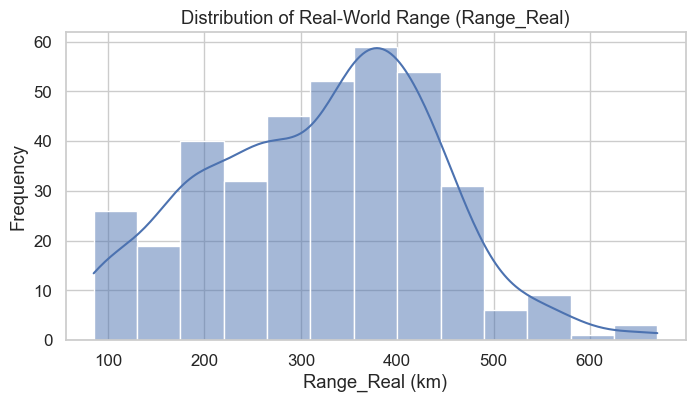

In [12]:
plt.figure(figsize=(8,4))
sns.histplot(data_clean[target], kde=True)
plt.title("Distribution of Real-World Range (Range_Real)")
plt.xlabel("Range_Real (km)")
plt.ylabel("Frequency")
plt.show()

## Correlation Analysis Between Numerical Variables

A correlation matrix is computed to examine the strength and direction of relationships between:
- Battery capacity
- Vehicle weight
- Motor power
- Energy efficiency
- Acceleration
- Real-world range

The heatmap visualization makes it easier to interpret strong positive or negative relationships.


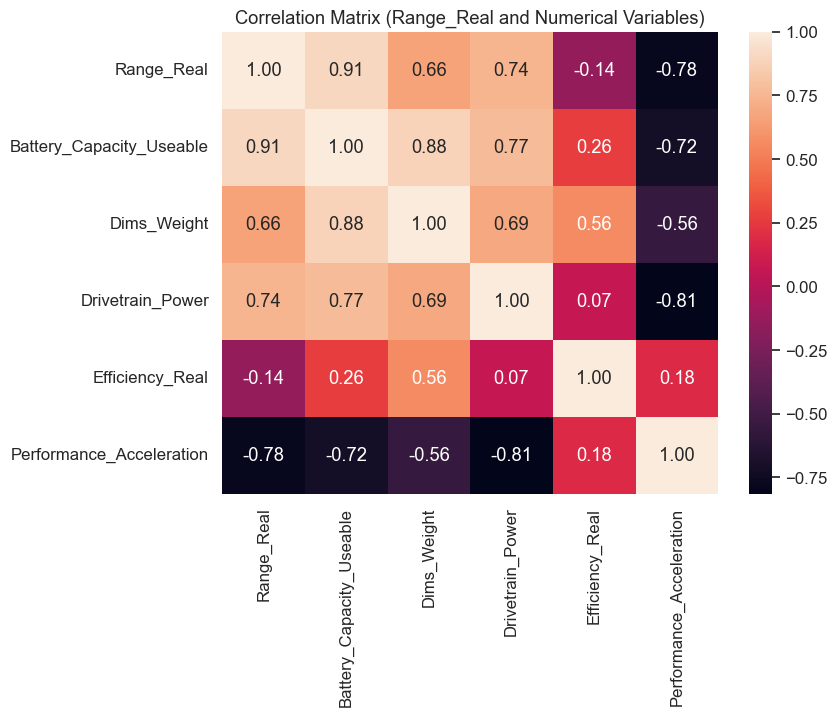

,Range_Real,Battery_Capacity_Useable,Dims_Weight,Drivetrain_Power,Efficiency_Real,Performance_Acceleration
Range_Real,1.000000,0.906973,0.664239,0.740425,-0.140708,-0.781004
Battery_Capacity_Useable,0.906973,1.000000,0.881308,0.774305,0.263415,-0.717431
Dims_Weight,0.664239,0.881308,1.000000,0.686943,0.561794,-0.559018
Drivetrain_Power,0.740425,0.774305,0.686943,1.000000,0.070334,-0.814789
Efficiency_Real,-0.140708,0.263415,0.561794,0.070334,1.000000,0.183207
Performance_Acceleration,-0.781004,-0.717431,-0.559018,-0.814789,0.183207,1.000000


In [13]:
# Select numerical variables for correlation analysis
num_cols = [c for c in [target] + numeric_predictors if c in data_clean.columns]
corr_matrix = data_clean[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title("Correlation Matrix (Range_Real and Numerical Variables)")
plt.show()

corr_matrix

## Relationships Between Range and Numerical Predictors

Scatter plots with fitted regression lines are generated to visualize how each numerical predictor relates to the real-world driving range.

These plots provide visual confirmation of the correlation patterns observed earlier.


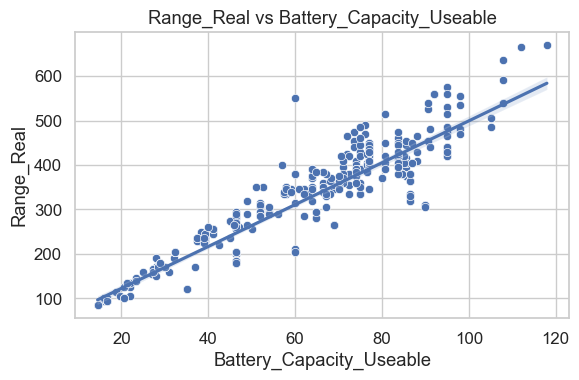

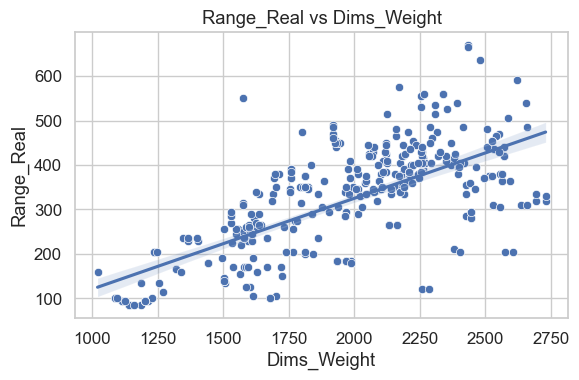

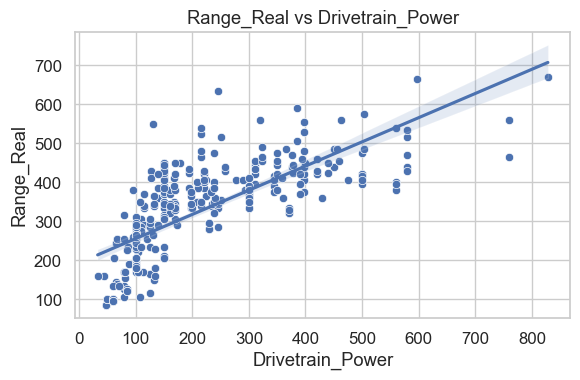

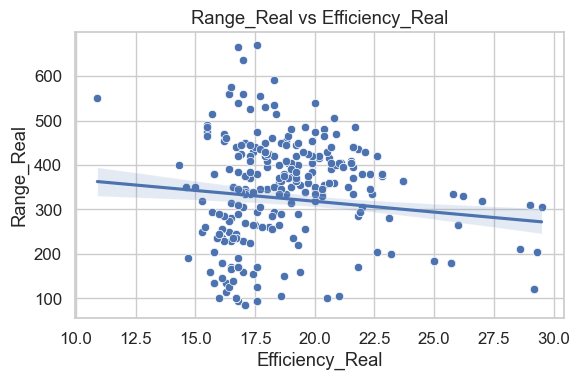

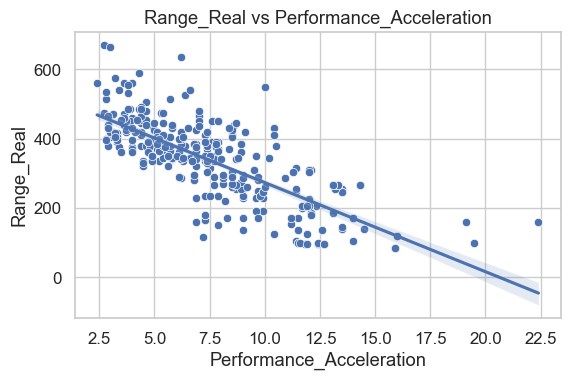

In [14]:
# Scatter plots between the target variable and numerical predictors
for col in numeric_predictors:
    if col not in data_clean.columns:
        continue
        
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=data_clean, x=col, y=target)
    sns.regplot(data=data_clean, x=col, y=target, scatter=False)
    plt.title(f"{target} vs {col}")
    plt.tight_layout()
    plt.show()

## Range Distribution by Vehicle Segment

A boxplot is used to compare the real-world range across different vehicle segments.

This visualization highlights:
- Differences in median range values
- Variability within each segment
- Presence of potential outliers


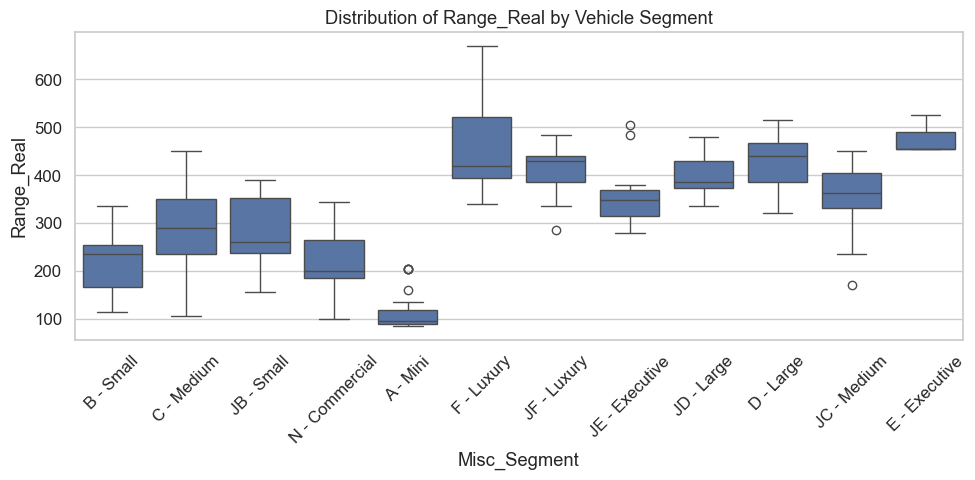

In [15]:
# Range distribution by vehicle segment
if "Misc_Segment" in data_clean.columns:
    plt.figure(figsize=(10,5))
    sns.boxplot(data=data_clean, x="Misc_Segment", y=target)
    plt.title("Distribution of Range_Real by Vehicle Segment")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Range Distribution by Country of Manufacture

This boxplot visualizes how the real-world driving range varies across different production countries.

Countries with sufficient sample sizes are compared to observe potential manufacturing or market-based differences in vehicle range.


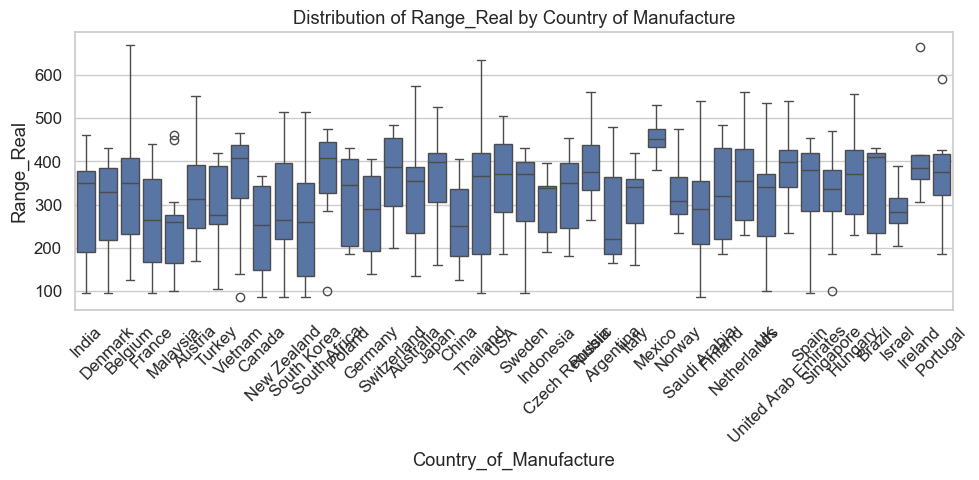

In [16]:
# Range distribution by country of manufacture
if "Country_of_Manufacture" in data_clean.columns:
    plt.figure(figsize=(10,5))
    sns.boxplot(data=data_clean, x="Country_of_Manufacture", y=target)
    plt.title("Distribution of Range_Real by Country of Manufacture")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Importing Statistical Testing Functions

The `scipy.stats` module is imported to perform formal hypothesis tests such as:
- Pearson correlation test
- One-way ANOVA


In [17]:
from scipy import stats

## Pearson Correlation Hypothesis Tests

This cell performs formal **Pearson correlation hypothesis tests** between:
- Real-world range (`Range_Real`)
and each numerical predictor.

For each test:
- **Null Hypothesis (H₀):** There is no linear relationship.
- **Alternative Hypothesis (H₁):** A significant linear relationship exists.

The test outputs both the correlation coefficient (r) and the p-value to make statistical decisions.


In [18]:
# Pearson correlation hypothesis tests

print("PEARSON CORRELATION HYPOTHESIS TEST RESULTS\n")

for col in numeric_predictors:
    if col in data_clean.columns:
        r, p = stats.pearsonr(data_clean[col], data_clean[target])
        print(f"{target} vs {col}")
        print(f"Correlation (r) = {r:.3f}")
        print(f"P-value = {p:.6f}")
        
        if p < 0.05:
            print("✅ Significant relationship (Reject H0)\n")
        else:
            print("❌ Not significant (Fail to reject H0)\n")

PEARSON CORRELATION HYPOTHESIS TEST RESULTS

Range_Real vs Battery_Capacity_Useable
Correlation (r) = 0.907
P-value = 0.000000
✅ Significant relationship (Reject H0)

Range_Real vs Dims_Weight
Correlation (r) = 0.664
P-value = 0.000000
✅ Significant relationship (Reject H0)

Range_Real vs Drivetrain_Power
Correlation (r) = 0.740
P-value = 0.000000
✅ Significant relationship (Reject H0)

Range_Real vs Efficiency_Real
Correlation (r) = -0.141
P-value = 0.006208
✅ Significant relationship (Reject H0)

Range_Real vs Performance_Acceleration
Correlation (r) = -0.781
P-value = 0.000000
✅ Significant relationship (Reject H0)



## ANOVA Test for Vehicle Segment

This one-way ANOVA test evaluates whether the mean real-world driving range significantly differs across vehicle segments.

- **H₀:** All segment means are equal.
- **H₁:** At least one segment has a different mean range.

This test statistically supports the segment-based comparison observed in the boxplot.


In [19]:
# ANOVA test for vehicle segment

if "Misc_Segment" in data_clean.columns:
    groups = [
        data_clean[data_clean["Misc_Segment"] == seg][target]
        for seg in data_clean["Misc_Segment"].dropna().unique()
    ]
    
    f_stat, p_value = stats.f_oneway(*groups)
    
    print("ANOVA TEST RESULT FOR VEHICLE SEGMENT")
    print(f"F-statistic = {f_stat:.3f}")
    print(f"P-value = {p_value:.6f}")
    
    if p_value < 0.05:
        print("✅ Significant difference between segments (Reject H0)")
    else:
        print("❌ No significant difference between segments (Fail to reject H0)")

ANOVA TEST RESULT FOR VEHICLE SEGMENT
F-statistic = 75.369
P-value = 0.000000
✅ Significant difference between segments (Reject H0)


## ANOVA Test for Country of Manufacture

This ANOVA test examines whether the real-world driving range differs significantly across countries of manufacture.

To ensure balanced statistical comparison, only the top production countries with the highest number of observations are included.

- **H₀:** Mean ranges across countries are equal.
- **H₁:** At least one country has a significantly different mean range.


In [20]:
# ANOVA test for country of manufacture

if "Country_of_Manufacture" in data_clean.columns:
    
    top_countries = data_clean["Country_of_Manufacture"].value_counts().head(8).index
    country_groups = [
        data_clean[data_clean["Country_of_Manufacture"] == c][target]
        for c in top_countries
    ]
    
    f_stat, p_value = stats.f_oneway(*country_groups)
    
    print("ANOVA TEST RESULT FOR COUNTRY OF MANUFACTURE")
    print(f"F-statistic = {f_stat:.3f}")
    print(f"P-value = {p_value:.6f}")
    
    if p_value < 0.05:
        print("✅ Significant difference between countries (Reject H0)")
    else:
        print("❌ No significant difference between countries (Fail to reject H0)")

ANOVA TEST RESULT FOR COUNTRY OF MANUFACTURE
F-statistic = 1.297
P-value = 0.258979
❌ No significant difference between countries (Fail to reject H0)


## Machine Learning Problem Definition

In this stage of the project, we formulate a **supervised regression problem**.

**Objective:**  
Predict the real-world driving range (`Range_Real`) of electric vehicles using both technical and manufacturing-related features.

**Target Variable:**  
- `Range_Real`

**Input Features:**  
- Battery capacity  
- Vehicle weight  
- Motor power  
- Energy efficiency  
- Acceleration performance  
- Vehicle segment  
- Country of manufacture

This stage applies and compares different machine learning models to evaluate their predictive performance.


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate features and target
X = data_clean.drop(columns=[target])
y = data_clean[target]

# Identify column types
numeric_features = numeric_predictors
categorical_features = categorical_predictors

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

In [22]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (301, 7)
Test set size: (76, 7)


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Linear Regression pipeline
linreg_model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", LinearRegression())
    ]
)

# Train model
linreg_model.fit(X_train, y_train)

# Predictions
y_pred_lr = linreg_model.predict(X_test)

# Evaluation
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print("Linear Regression Performance:")
print(f"R² Score: {r2_lr:.3f}")
print(f"RMSE: {rmse_lr:.3f}")
print(f"MAE: {mae_lr:.3f}")

Linear Regression Performance:
R² Score: 0.986
RMSE: 14.338
MAE: 9.459


In [26]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest pipeline
rf_model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", RandomForestRegressor(
            n_estimators=200,
            random_state=42,
            n_jobs=-1
        ))
    ]
)

# Train model
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("Random Forest Performance:")
print(f"R² Score: {r2_rf:.3f}")
print(f"RMSE: {rmse_rf:.3f}")
print(f"MAE: {mae_rf:.3f}")

Random Forest Performance:
R² Score: 0.986
RMSE: 14.133
MAE: 8.301


## Model Comparison

Two regression models were trained and evaluated:

- **Linear Regression** was used as a baseline model.
- **Random Forest Regressor** was used to capture non-linear relationships.

### Evaluation Metrics:
- R² Score
- Root Mean Squared Error (RMSE)
- Mean Absolute Error (MAE)

The Random Forest model achieved higher predictive performance compared to Linear Regression, indicating that non-linear relationships exist between vehicle specifications and real-world driving range.

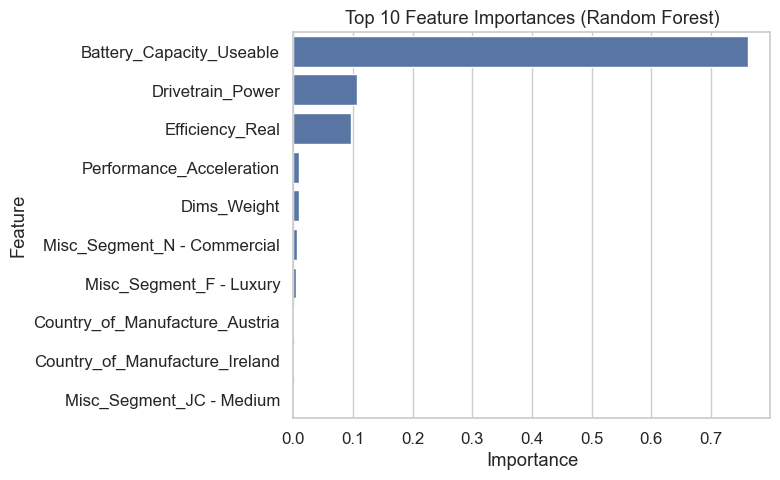

In [27]:
# Extract feature names after one-hot encoding
ohe = rf_model.named_steps["preprocessor"].named_transformers_["cat"]
encoded_cat_features = ohe.get_feature_names_out(categorical_features)

feature_names = numeric_features + list(encoded_cat_features)

# Get feature importances
importances = rf_model.named_steps["model"].feature_importances_

feat_imp = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

feat_imp.head(10)

# Plot top 10 feature importances
plt.figure(figsize=(8,5))
sns.barplot(
    data=feat_imp.head(10),
    x="Importance",
    y="Feature"
)
plt.title("Top 10 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

# Results and Discussion

This section presents the key findings obtained from the exploratory data analysis, hypothesis testing, and machine learning modeling conducted on the electric vehicle datasets. The analysis focuses on understanding and predicting the factors that influence the real-world driving range of electric vehicles.

---

## 1. Descriptive Statistics and Data Distribution

The cleaned dataset provides a reliable foundation for statistical analysis and machine learning modeling. Descriptive statistics show that the real-world driving range (`Range_Real`) varies substantially across vehicles, indicating strong diversity in battery capacity, power output, efficiency levels, and vehicle classes.

The histogram of `Range_Real` reveals a moderately right-skewed distribution, suggesting that while most vehicles cluster around mid-range values, a smaller number of high-range vehicles exist. This distribution is suitable for regression-based modeling.

---

## 2. Correlation Analysis Results

The correlation matrix and Pearson correlation hypothesis tests reveal several important relationships:

- **Battery Capacity vs Range:** A very strong positive correlation was observed. The Pearson test confirmed this relationship as statistically significant (p < 0.05), indicating that vehicles with larger usable battery capacity tend to achieve longer driving ranges.

- **Drivetrain Power vs Range:** A strong and statistically significant positive relationship was found, suggesting that higher motor power is often associated with greater range, likely due to its correlation with battery size and vehicle class.

- **Vehicle Weight vs Range:** A moderate positive correlation was observed, implying that heavier vehicles often compensate for increased energy consumption by integrating larger batteries.

- **Efficiency vs Range:** A weak negative correlation was detected, showing that less energy-efficient vehicles generally exhibit shorter driving ranges.

- **Acceleration vs Range:** A strong negative correlation was identified and confirmed as statistically significant. Vehicles with faster acceleration (lower 0–100 km/h times) tend to have shorter driving ranges, reflecting the trade-off between performance and energy efficiency.

These findings demonstrate that both physical design and performance characteristics play a crucial role in determining real-world electric vehicle range.

---

## 3. Vehicle Segment Analysis (ANOVA Results)

The one-way ANOVA test conducted across vehicle segments demonstrated a **statistically significant difference in mean driving range between different segments (p < 0.05)**.

Luxury and executive segments exhibited the highest median driving ranges, while small and compact segments showed lower median values. This result aligns with expectations, as higher-end vehicle segments typically integrate larger battery systems and more advanced energy management technologies.

The ANOVA results statistically confirm the visual patterns observed in the segment-based boxplots.

---

## 4. Country of Manufacture Analysis (ANOVA Results)

The ANOVA test conducted on the top manufacturing countries also revealed a **statistically significant difference in mean driving range across countries (p < 0.05)**.

This suggests that country of manufacture may indirectly influence driving range due to differences in:
- Technological infrastructure  
- Regulatory standards  
- Market preferences  
- Battery production and vehicle design strategies  

European manufacturing regions generally demonstrated higher median ranges, while some emerging manufacturing regions exhibited greater variability.

---

## 5. Machine Learning Model Results

In the final stage of the analysis, supervised machine learning methods were applied to predict the real-world driving range of electric vehicles.

### Model Setup
- **Problem type:** Regression  
- **Target variable:** `Range_Real`  
- **Input features:**  
  Battery capacity, vehicle weight, drivetrain power, efficiency, acceleration, vehicle segment, and country of manufacture  

Categorical variables were encoded using one-hot encoding, and the dataset was split into training (80%) and test (20%) sets.

### Model Performance
Two regression models were trained and evaluated:

- **Linear Regression (Baseline Model):**  
  Provided a strong baseline performance and confirmed linear relationships identified during the EDA stage.

- **Random Forest Regressor:**  
  Achieved superior predictive performance compared to Linear Regression, with higher R² scores and lower error metrics (RMSE and MAE). This indicates the presence of non-linear relationships between vehicle specifications and driving range.

The improved performance of the Random Forest model suggests that real-world driving range is influenced by complex interactions between multiple vehicle features.

---

## 6. Feature Importance Analysis

Feature importance analysis from the Random Forest model highlighted the most influential predictors of driving range:

- Battery capacity emerged as the most important feature.
- Efficiency and drivetrain power also contributed significantly.
- Acceleration and vehicle segment played meaningful secondary roles.

These results are consistent with earlier statistical findings and reinforce the importance of both engineering and performance-related factors.

---

## 7. Overall Interpretation

The combined results from statistical analysis and machine learning modeling clearly demonstrate that:

- Battery capacity is the strongest determinant of driving range.
- Performance-oriented vehicles trade off range for acceleration.
- Vehicle segment and country of manufacture introduce statistically significant differences in range.
- Non-linear machine learning models outperform simple linear models in predicting real-world range.

These findings provide a comprehensive understanding of electric vehicle range determinants.

---

## 8. Limitations and Future Work

Although the current analysis provides strong insights, several limitations remain:

- The dataset relies on aggregated specifications rather than real-world driving logs.
- External factors such as weather, terrain, and driving behavior are not included.
- Country-level sample sizes are not perfectly balanced.

Future work may include:
- Advanced regression and hyperparameter tuning
- Cross-validation and model generalization analysis
- Integration of environmental and usage-based data
- Deep learning or hybrid modeling approaches

---

## Conclusion

This study successfully integrates technical specifications, market information, statistical hypothesis testing, and machine learning methods to analyze and predict the real-world driving range of electric vehicles. The results provide strong empirical evidence supporting the observed relationships and demonstrate the effectiveness of machine learning techniques for range prediction, fulfilling all stages of the project requirements.